In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
from datetime import timedelta
%matplotlib inline
import yfinance as yf

In [2]:
df = yf.download('fb amzn aapl nflx goog ', start="2015-01-01", end="2019-12-13", freq = 'B')

[*********************100%***********************]  5 of 5 downloaded


In [3]:
df.tail()

Adj Close                                     Close           \
                AAPL     AMZN      FB     GOOG    NFLX    AAPL     AMZN   
Date                                                                      
2019-12-09    266.92  1749.51  201.34  1343.56  302.50  266.92  1749.51   
2019-12-10    268.48  1739.21  200.87  1344.66  293.12  268.48  1739.21   
2019-12-11    270.77  1748.72  202.26  1345.02  298.93  270.77  1748.72   
2019-12-12    271.46  1760.33  196.75  1350.27  298.44  271.46  1760.33   
2019-12-13    275.15  1760.94  194.11  1347.83  298.50  275.15  1760.94   

                                     ...    Open                            \
                FB     GOOG    NFLX  ...    AAPL     AMZN      FB     GOOG   
Date                                 ...                                     
2019-12-09  201.34  1343.56  302.50  ...  270.00  1750.66  200.65  1338.04   
2019-12-10  200.87  1344.66  293.12  ...  268.60  1747.40  201.66  1341.50   
2019-12-11  202.26  1345.02  298.93  ...  268.81  1741.67  200.28  1350.84   
2019-12-12  196.75  1350.27  298.44  ...  267.78  1750.00  202.35  1345.94   
2019-12-13  194.11  1347.83  298.50  ...  271.46  1765.00  196.40  1347.95   

                      Volume                                        
              NFLX      AAPL     AMZN        FB     GOOG      NFLX  
Date                                                                
2019-12-09  307.35  32010600  2442800  11954800  1354300   5748400  
2019-12-10  296.12  22605100  2514300   9475700  1094100  10476100  
2019-12-11  294.49  19689200  2097600   8036800   850400   5589800  
2019-12-12  295.67  34327600  3095900  23734800  1281000   4766600  
2019-12-13  298.50  33396900  2745700  18798000  1549600   3879700  

[5 rows x 30 columns]

In [4]:
#df['Adj Close']

Text(0, 0.5, 'Stock Price')

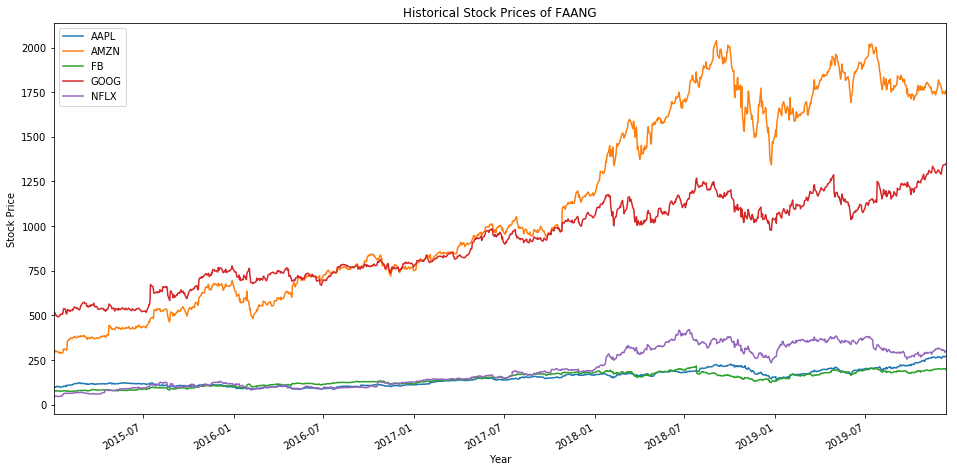

In [5]:
ax = df['Adj Close'].plot(title = "Historical Stock Prices of FAANG",figsize=(16,8))
ax.set_xlabel("Year")
ax.set_ylabel("Stock Price")

In [6]:
#Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    '''Augmented Dickey-Fuller Test Test for Stationarity'''
       
    print('Results of Dickey-Fuller Test:')
    df_test = adfuller(timeseries, autolag = 'AIC')
    df_output = pd.Series(df_test[0:4],
                          index = ['Test Statistic','p-value','#Lags Used',
                                    'Number of Observations Used'])
    
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    
    print(df_output)

In [7]:
import functools
df['Adj Close'].apply(functools.partial(test_stationarity))

Results of Dickey-Fuller Test:
Test Statistic                    0.632268
p-value                           0.988385
#Lags Used                        9.000000
Number of Observations Used    1237.000000
Critical Value (1%)              -3.435647
Critical Value (5%)              -2.863879
Critical Value (10%)             -2.568015
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -0.997307
p-value                           0.754245
#Lags Used                       18.000000
Number of Observations Used    1228.000000
Critical Value (1%)              -3.435686
Critical Value (5%)              -2.863896
Critical Value (10%)             -2.568025
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -1.461302
p-value                           0.552560
#Lags Used                        0.000000
Number of Observations Used    1246.000000
Critical Value (1%)              -3.435609
Critical Value (5%)              -2.863862
Critical Value (1

AAPL    None
AMZN    None
FB      None
GOOG    None
NFLX    None
dtype: object

In [8]:
FAANGDiff = df['Adj Close'].diff().dropna()
FAANGDiff.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2015-01-05,-2.83,-6.33,-1.26,-10.91,-2.54
2015-01-06,0.01,-6.90,-1.04,-11.87,-0.81
2015-01-07,1.37,3.13,0.00,-0.86,0.24
2015-01-08,3.81,2.04,2.03,1.57,1.04
2015-01-09,0.11,-3.53,-0.44,-6.49,-0.74


In [9]:
FAANGDiff.apply(functools.partial(test_stationarity))

Results of Dickey-Fuller Test:
Test Statistic                -1.046468e+01
p-value                        1.331189e-18
#Lags Used                     8.000000e+00
Number of Observations Used    1.237000e+03
Critical Value (1%)           -3.435647e+00
Critical Value (5%)           -2.863879e+00
Critical Value (10%)          -2.568015e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.742685e+00
p-value                        1.051675e-11
#Lags Used                     1.700000e+01
Number of Observations Used    1.228000e+03
Critical Value (1%)           -3.435686e+00
Critical Value (5%)           -2.863896e+00
Critical Value (10%)          -2.568025e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -35.925999
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1245.000000
Critical Value (1%)              -3.435613
Critical Value (5%)              -2.863864
Cri

AAPL    None
AMZN    None
FB      None
GOOG    None
NFLX    None
dtype: object

In [10]:
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(FAANGDiff)

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [11]:
modsel = model.select_order(15)
modsel.summary()

,AIC,BIC,FPE,HQIC
0,16.66,16.68*,1.718e+07,16.67*
1,16.67,16.79,1.730e+07,16.71
2,16.66,16.89,1.723e+07,16.75
3,16.67,17.00,1.741e+07,16.80
4,16.69,17.13,1.776e+07,16.86
5,16.69,17.23,1.766e+07,16.89
6,16.67,17.31,1.733e+07,16.91
7,16.65*,17.40,1.710e+07*,16.94
8,16.66,17.51,1.715e+07,16.98
9,16.67,17.62,1.733e+07,17.03


In [12]:
results = model.fit(maxlags = 15, ic = 'aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 17, Dec, 2019
Time:                     20:49:10
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    17.3749
Nobs:                     1239.00    HQIC:                   16.9106
Log likelihood:          -18913.1    FPE:                1.66982e+07
AIC:                      16.6307    Det(Omega_mle):     1.44702e+07
--------------------------------------------------------------------
Results for equation AAPL
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.140826         0.068110            2.068           0.039
L1.AAPL         0.040974         0.036145            1.134           0.257
L1.AMZN        -0.006786         0.004889           -1.388           0.165
L1.FB     

In [13]:
granges = results.test_causality(['AAPL','AMZN','FB','NFLX'],['GOOG'], kind = 'f')
granges.summary()

Test statistic,Critical value,p-value,df
2.253,1.478,0.000,"(28, 6015)"


In [14]:
granges = results.test_causality(['GOOG','AMZN','FB','NFLX'],['AAPL'], kind = 'f')
granges.summary()

Test statistic,Critical value,p-value,df
1.515,1.478,0.040,"(28, 6015)"


In [15]:
granges = results.test_causality(['AAPL','GOOG','FB','NFLX'],['AMZN'], kind = 'f')
granges.summary()

Test statistic,Critical value,p-value,df
1.398,1.478,0.079,"(28, 6015)"


In [16]:
granges = results.test_causality(['AAPL','AMZN','GOOG','NFLX'],['FB'], kind = 'f')
granges.summary()

Test statistic,Critical value,p-value,df
2.301,1.478,0.000,"(28, 6015)"


In [17]:
granges = results.test_causality(['AAPL','AMZN','FB','GOOG'],['NFLX'], kind = 'f')
granges.summary()

Test statistic,Critical value,p-value,df
3.170,1.478,0.000,"(28, 6015)"


In [18]:
fcast = results.forecast(FAANGDiff.values,360)

In [19]:
pd.DataFrame(fcast).head()

,0,1,2,3,4
0,0.711348,6.750122,0.733237,3.237835,-0.978588
1,0.131192,-3.466707,-0.110904,2.091582,0.422264
2,0.355755,-3.910911,-0.187138,3.195733,-0.726033
3,1.492376,15.318146,1.493478,7.667715,1.968622
4,0.218259,0.317184,0.009900,-0.158260,0.268912


In [20]:
AAPLvalues = pd.DataFrame(fcast)[0]
AMZNvalues = pd.DataFrame(fcast)[1]
FBvalues = pd.DataFrame(fcast)[2]
GOOGvalues = pd.DataFrame(fcast)[3]
NFLXvalues = pd.DataFrame(fcast)[4]

In [21]:
df[('Adj Close')].tail(1)

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2019-12-13,275.15,1760.94,194.11,1347.83,298.5


In [22]:
DeDiff_AAPL = np.cumsum(AAPLvalues) + 275.15

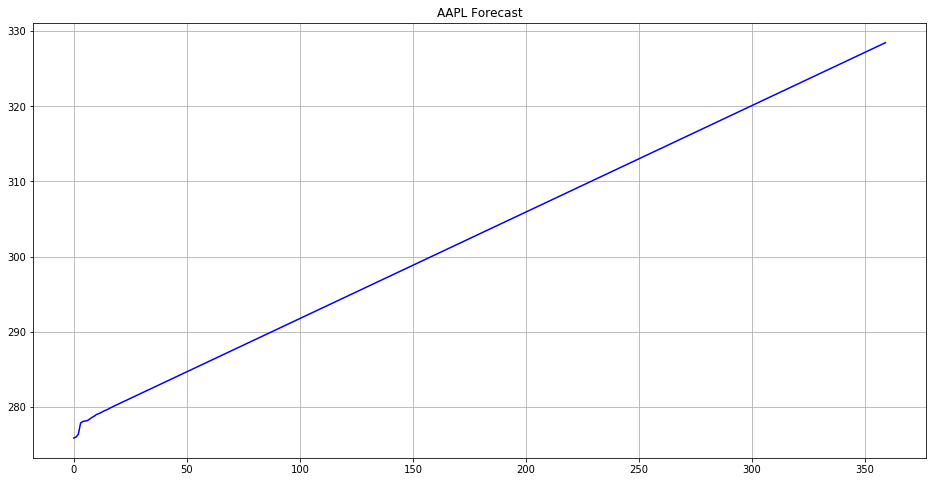

In [25]:
plt.figure(figsize = (16,8))
plt.plot(DeDiff_AAPL, color ='blue')
plt.title('AAPL Forecast')
plt.grid()
plt.show()

In [26]:
DeDiff_AMZN = np.cumsum(AMZNvalues) + 1760.94

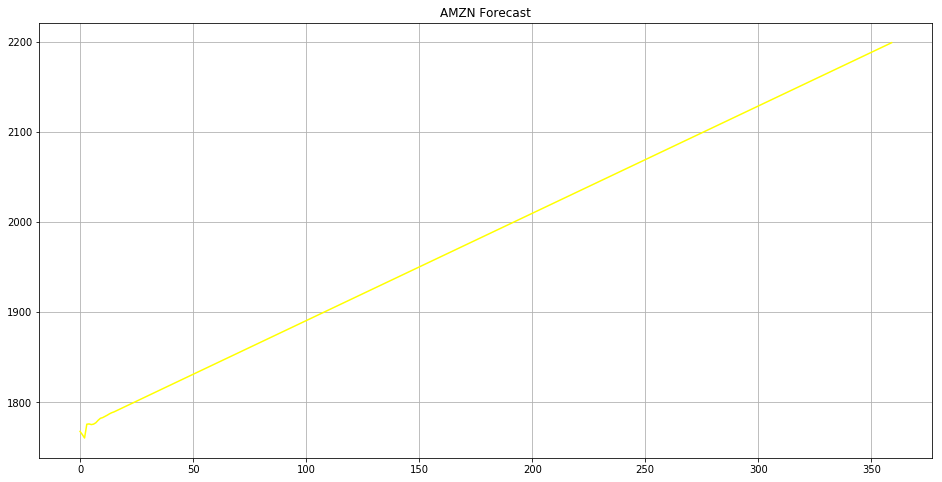

In [27]:
plt.figure(figsize = (16,8))
plt.plot(DeDiff_AMZN,color ='yellow')
plt.title('AMZN Forecast')
plt.grid()
plt.show()

In [28]:
DeDiff_FB = np.cumsum(FBvalues) + 194.11

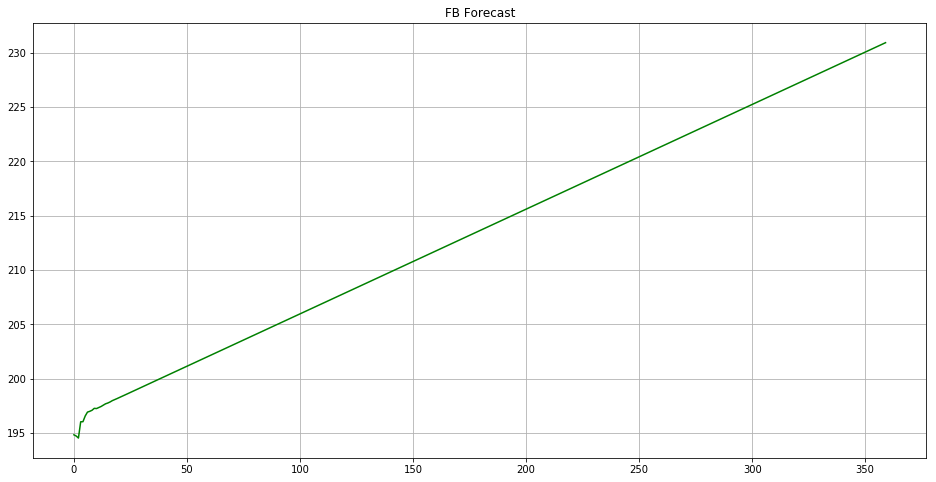

In [29]:
plt.figure(figsize = (16,8))
plt.plot(DeDiff_FB, color ='green')
plt.title('FB Forecast')
plt.grid()
plt.show()

In [30]:
DeDiff_GOOG = np.cumsum(GOOGvalues) + 1347.83

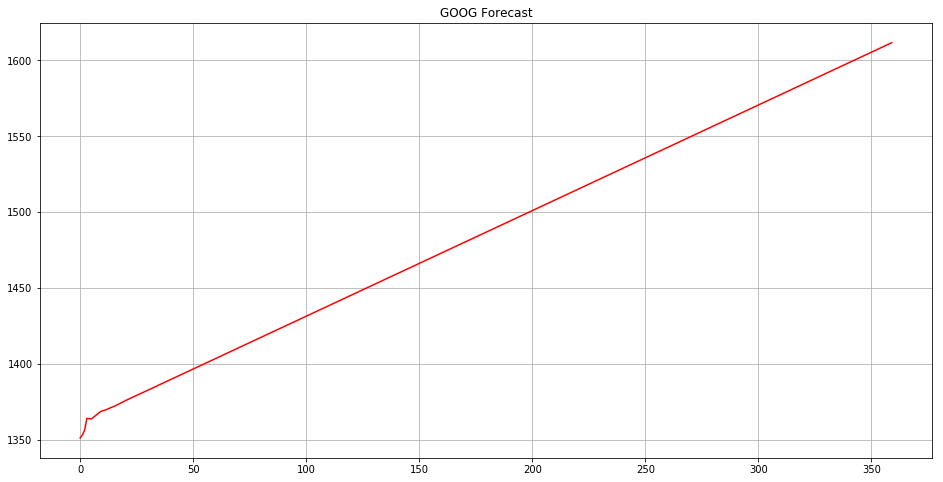

In [31]:
plt.figure(figsize = (16,8))
plt.plot(DeDiff_GOOG, color ='red')
plt.title('GOOG Forecast')
plt.grid()
plt.show()

In [32]:
DeDiff_NFLX = np.cumsum(NFLXvalues) + 298.5

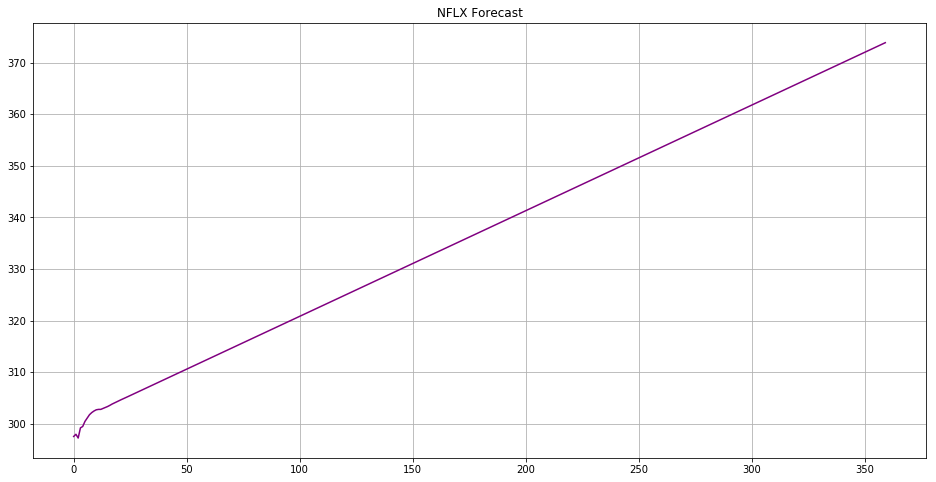

In [33]:
plt.figure(figsize = (16,8))
plt.plot(DeDiff_NFLX, color ='purple')
plt.title('NFLX Forecast')
plt.grid()
plt.show()